## Silhoutte Distance

Silhoutte Distance is used to study the separation between clusters. It can be used to evaluate and select the number of clusters. The formula is given by:

$$ s\left(i\right)=\frac{b\left(i\right)-a\left(i\right)}{\max\left(a\left(i\right),b\left(i\right)\right)} $$

Where, 
1. $a(i)$ = average distance of point $i$ with other members of same cluster. 
2. $b(i)$ = lowest of average distance of point $i$ with member of clusters other than the one it is currently present in. 

The value of $s(i)$ ranges from:

$$-1\le s\left(i\right)\le1$$

The value will be close to 1 when $b(i) >> a(i)$. That is when the nearest neighbor of point $i$ is very far & the members of clusters that $i$ is a part of aren't very far apart. This is the case when the clustering has worked well. 

The opposite case is when the value is close to -1. This happens when $a(i) >> b(i)$. That is when the the average distance of point within cluster is more than that of the neighboring one, then this indicates that the current point would do better if it is assigned to the neighboring one. 

In [2]:
from sklearn.datasets import make_blobs

# create fake dataset
X, y = make_blobs(100, centers=3)

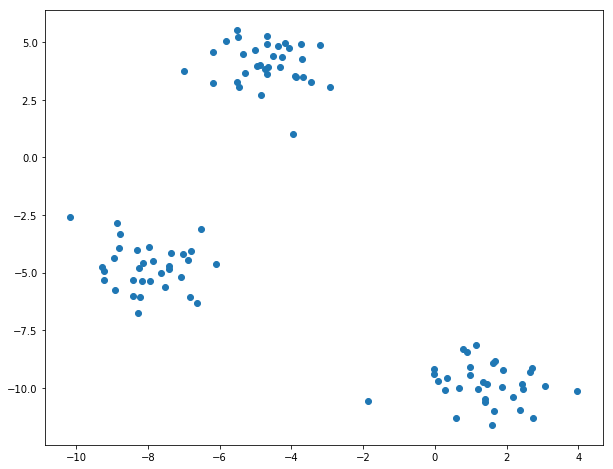

In [11]:
# Visualize data
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.show()

In [13]:
# create classifier
import numpy as np
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=3)
y_pred = clf.fit_predict(X)

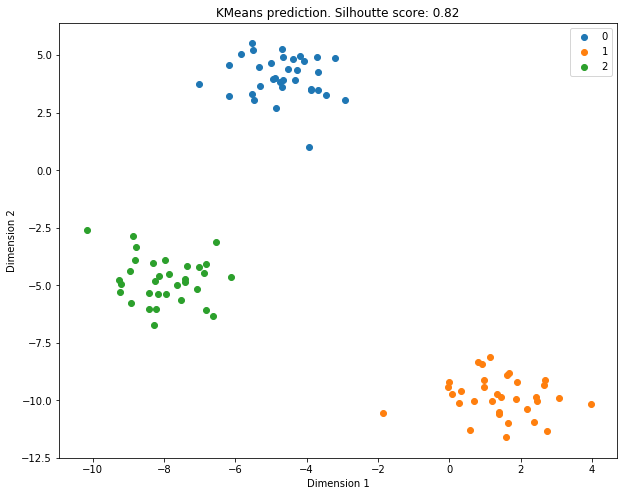

In [19]:
# visualize output
from sklearn.metrics import silhouette_score

fig = plt.figure(figsize=(10, 8))
for label in np.unique(y_pred):
    X_label = X[y==label]
    plt.scatter([x[0] for x in X_label], [x[1] for x in X_label], label=label)

score = silhouette_score(X, y_pred)
plt.legend()
plt.title("KMeans prediction. Silhoutte score: {0:.2f}".format(score))
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

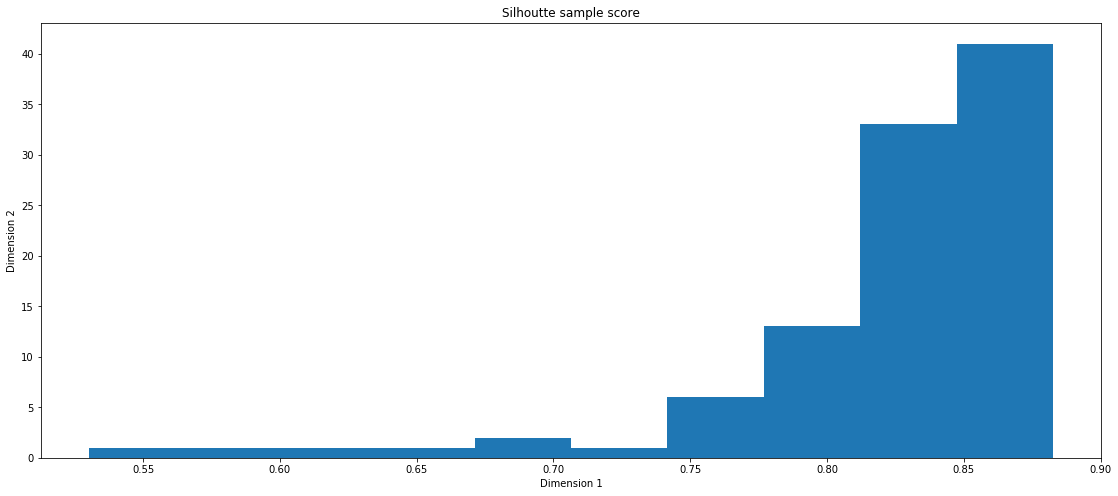

In [25]:
# visualize silhoutte sample scores
from sklearn.metrics import silhouette_samples

fig = plt.figure(figsize=(19, 8))
sample_score = silhouette_samples(X, y_pred)
plt.hist(sample_score)
plt.title("Silhoutte sample score".format(score))
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

Since most scores are close to 1, we conclude that the model is performing very good. 